In [465]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [466]:
df = pd.read_csv("./datasets/fitbit_data.csv")

In [467]:
df.head(10)

,date,calories,distances,steps
0,2021.4.7,1744.27,7.300000,10174
1,2021.4.8,1865.11,3.460000,4829
2,2021.4.9,2406.20,5.920000,8262
3,2021.4.10,2384.56,6.350000,8864
4,2021.4.11,2456.50,6.059999,8467
5,2021.4.12,2032.28,3.670000,5120
6,2021.4.13,2498.19,7.540000,10557
7,2021.4.14,2220.59,7.599999,10594
8,2021.4.15,2074.16,5.970000,8313
9,2021.4.16,2336.62,8.110000,11314


### null값이 아닌 값이 0인 데이터를 Nan과 같다 판단하고 진행하여야 한다.

In [468]:
### 중간에 날짜가 확 건너뛰는 부분이 있는데 이 부분은 수집 중 멈춘 이상치라 판단하여 제거하였다
df["calories"].min()

319.72

In [469]:
df["calories"][df["calories"]==319.72].index

Int64Index([91], dtype='int64')

In [470]:
df = df.drop(91)

In [471]:
df["calories"][df["calories"]==319.72].index

Int64Index([], dtype='int64')

In [472]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 0 to 166
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       166 non-null    object 
 1   calories   166 non-null    float64
 2   distances  166 non-null    float64
 3   steps      166 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 6.5+ KB


In [473]:
print(pd.Series(df["date"]==0).value_counts())
print(pd.Series(df["calories"]==0).value_counts())
print(pd.Series(df["distances"]==0).value_counts())
print(pd.Series(df["steps"]==0).value_counts())

False    166
Name: date, dtype: int64
False    166
Name: calories, dtype: int64
False    106
True      60
Name: distances, dtype: int64
False    107
True      59
Name: steps, dtype: int64


In [474]:
(pd.Series(df["distances"]==0) & pd.Series(df["steps"]==0)).value_counts()

False    107
True      59
dtype: int64

In [475]:
df['DayName']=  pd.to_datetime(df['date'])
df["DayofWeek"] = df["DayName"].dt.day_name()

###  distances에 60, steps에 59개의 0(Nan)값이 존재한다
### 또한 둘이 동시에 0인 data가 60개이므로 둘이 동시에 결측치가 된 경우가 많다

In [476]:
not_nan_rows = (df["distances"][df["distances"]!=0].index)
nan_rows = (df["distances"][df["distances"]==0].index)

In [477]:
df.loc[nan_rows]

,date,calories,distances,steps,DayName,DayofWeek
29,2021.5.6,1400.30,0.0,0,2021-05-06,Thursday
31,2021.5.8,1336.65,0.0,0,2021-05-08,Saturday
39,2021.5.16,1527.60,0.0,0,2021-05-16,Sunday
40,2021.5.17,1336.65,0.0,0,2021-05-17,Monday
43,2021.5.20,1400.30,0.0,0,2021-05-20,Thursday
44,2021.5.21,1463.95,0.0,0,2021-05-21,Friday
49,2021.5.26,1400.72,0.0,0,2021-05-26,Wednesday
53,2021.5.30,1464.05,0.0,0,2021-05-30,Sunday
54,2021.5.31,1527.60,0.0,0,2021-05-31,Monday
55,2021.6.1,1527.60,0.0,0,2021-06-01,Tuesday


데이터가 적어지더라고 0인 모든 데이터를 핏빗을 착용하지 않았다고 가정하고 진행하는게 맞다

<AxesSubplot:xlabel='calories', ylabel='Count'>

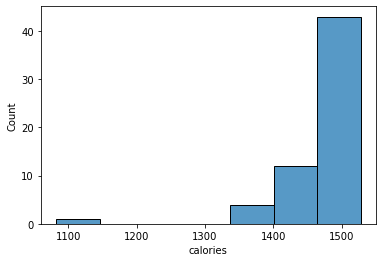

In [478]:
sns.histplot(df["calories"][nan_rows])

<AxesSubplot:xlabel='calories', ylabel='Count'>

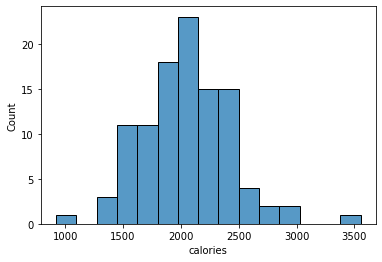

In [479]:
sns.histplot(df["calories"][not_nan_rows])

In [480]:
df["calories"][df["calories"] < 1100].index

Int64Index([17, 146], dtype='int64')

17, 146행 역시 같은 이유로 제거한다

In [481]:
df = df.drop([17, 146])

In [482]:
not_nan_rows = (df["distances"][df["distances"]!=0].index)
nan_rows = (df["distances"][df["distances"]==0].index)

<AxesSubplot:xlabel='calories', ylabel='Count'>

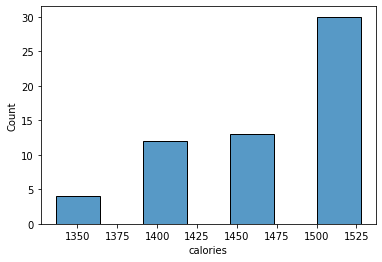

In [483]:
sns.histplot(df["calories"][nan_rows])

<AxesSubplot:xlabel='calories', ylabel='Count'>

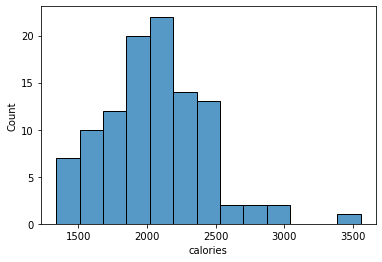

In [484]:
sns.histplot(df["calories"][not_nan_rows])

In [485]:
temp = (df["calories"][df["calories"] > 2500].index)

In [486]:
df.loc[temp]

,date,calories,distances,steps,DayName,DayofWeek
13,2021.4.20,2616.04,11.10,15456,2021-04-20,Tuesday
16,2021.4.23,2504.36,7.94,11104,2021-04-23,Friday
99,2021.9.3,2666.23,7.43,10361,2021-09-03,Friday
113,2021.9.17,2503.28,5.24,7307,2021-09-17,Friday
156,2021.11.4,3552.73,13.79,19259,2021-11-04,Thursday
157,2021.11.5,2967.06,12.34,17319,2021-11-05,Friday
163,2021.11.11,2732.86,9.00,12536,2021-11-11,Thursday
164,2021.11.12,2774.22,6.45,8985,2021-11-12,Friday
165,2021.11.13,2954.84,7.71,10621,2021-11-13,Saturday


In [487]:
###접근을 쉽게하기 위하여 데이터프레임을 쪼개주었다
equip_day = df.loc[not_nan_rows]
not_equip_day = df.loc[nan_rows]

칼로리가 많은 날은 정말로 이동거리가 많아서 높은날이므로 이상치로 판단하지 않았다

# 1번 문제

In [488]:
print("핏빗 착용 시 평균 칼로리: ", equip_day["calories"].mean() , "\t평균 이동거리: ", equip_day["distances"].mean(),
      '\t 평균 step수: ', equip_day["steps"].mean())
print("핏빗 미착용 시 평균 칼로리: ", not_equip_day["calories"].mean() , "\t평균 이동거리: ", not_equip_day["distances"].mean(),
      '\t 평균 step수: ', not_equip_day["steps"].mean())

핏빗 착용 시 평균 칼로리:  2057.4183809523806 	평균 이동거리:  4.488666657142855 	 평균 step수:  6250.504761904762
핏빗 미착용 시 평균 칼로리:  1474.8525423728813 	평균 이동거리:  0.0 	 평균 step수:  0.23728813559322035


# 2번 문제 

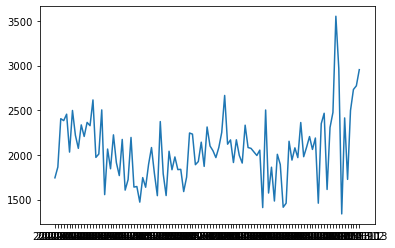

In [489]:
plt.plot(df["date"][not_nan_rows], df["calories"][not_nan_rows])

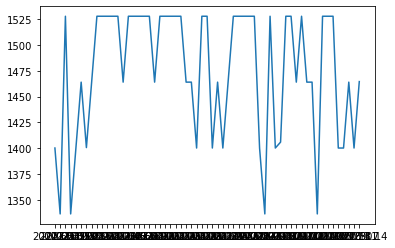

In [490]:
plt.plot(df["date"][nan_rows], df["calories"][nan_rows])

# 3번 문제

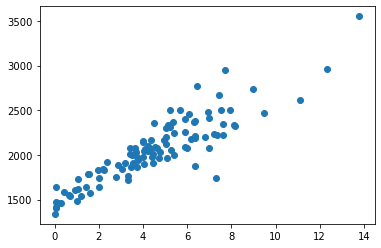

In [491]:
plt.scatter(df["distances"][not_nan_rows], df["calories"][not_nan_rows])

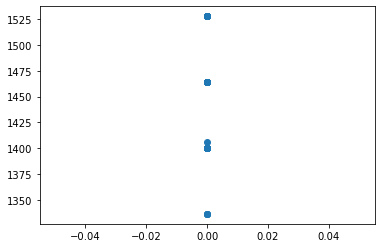

In [492]:
plt.scatter(df["distances"][nan_rows], df["calories"][nan_rows])

C:\Users\hjhhi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='distances', ylabel='calories'>

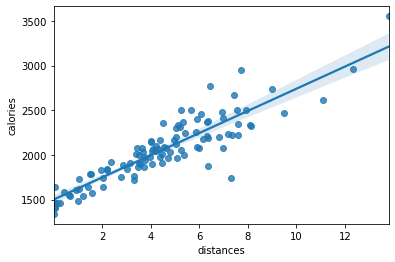

In [493]:
sns.regplot(df["distances"][not_nan_rows], df["calories"][not_nan_rows])

# 4번 문제

<AxesSubplot:xlabel='distances', ylabel='DayofWeek'>

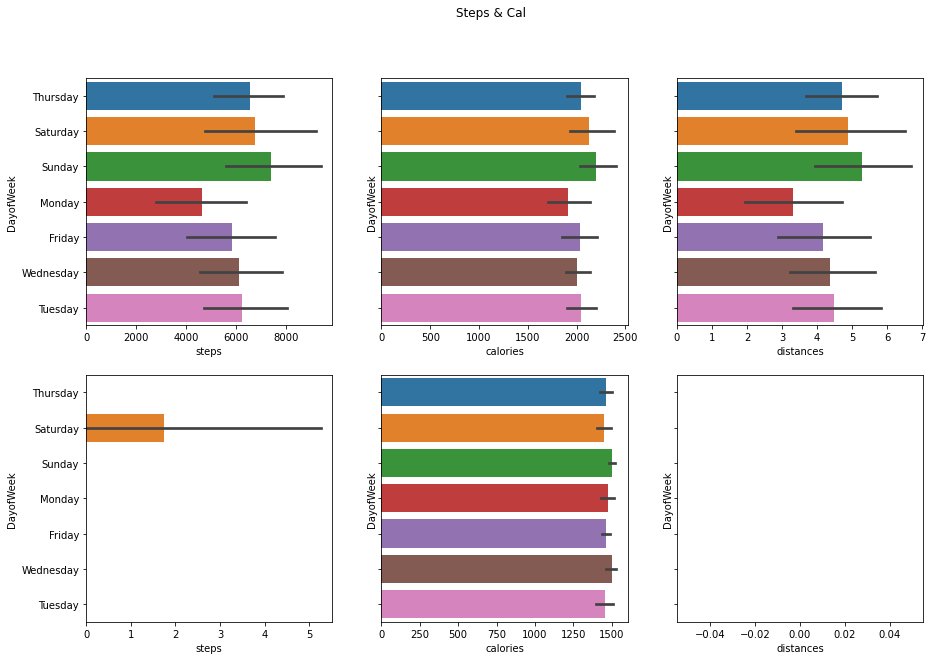

In [494]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=True)
fig.suptitle('Steps & Cal')
sns.barplot(ax=axes[0,0], x=equip_day["steps"], y = equip_day["DayofWeek"])
sns.barplot(ax=axes[0,1],x = equip_day["calories"], y = equip_day["DayofWeek"])
sns.barplot(ax=axes[0,2],x = equip_day["distances"], y = equip_day["DayofWeek"])

sns.barplot(ax=axes[1,0], x=not_equip_day["steps"], y = not_equip_day["DayofWeek"])
sns.barplot(ax=axes[1,1],x = not_equip_day["calories"], y = not_equip_day["DayofWeek"])
sns.barplot(ax=axes[1,2],x = not_equip_day["distances"], y = not_equip_day["DayofWeek"])